In [8]:
import torch
import torch.nn as nn
import pandas as pd
from torch import optim
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [9]:
df_x_train = pd.read_csv("/Users/placid_brain/Documents/non text content based models/7_aug/train/X_train.csv")
df_y_train = pd.read_csv("/Users/placid_brain/Documents/non text content based models/7_aug/train/y_train.csv")

df_x_test = pd.read_csv("/Users/placid_brain/Documents/non text content based models/7_aug/test/X_test.csv")
df_y_test = pd.read_csv("/Users/placid_brain/Documents/non text content based models/7_aug/test/y_test.csv")

df_x_train = df_x_train.drop(["original_text"], axis=1)
df_x_test = df_x_test.drop(["original_text"], axis=1)

print(df_x_train.head())
print('\n')
print(df_y_train.head())
print('\n')
print(df_x_test.head())
print('\n')
print(df_y_test.head())





   Unnamed: 0  compound  is_retweeted_encoded  day  hour_posted  \
0        9069    0.2960                   0.0  4.0         18.0   
1        2603    0.2263                   1.0  4.0         12.0   
2        7738    0.0000                   1.0  4.0         17.0   
3        1579    0.4019                   1.0  2.0         20.0   
4        5058    0.0000                   1.0  4.0         13.0   

   original_author_class  
0               169156.0  
1                18220.0  
2               189549.0  
3                94628.0  
4                16234.0  


   Unnamed: 0  retweet_count
0        9069           83.0
1        2603         1350.0
2        7738         6343.0
3        1579          581.0
4        5058           19.0


   Unnamed: 0  compound  is_retweeted_encoded  day  hour_posted  \
0        6252    0.1779                   1.0  4.0         14.0   
1        4684    0.5106                   1.0  4.0         13.0   
2        1731    0.0000                   0.0  2.0      

In [10]:
df_x_train.drop(df_x_train.columns[[0]], axis=1,inplace=True)
df_y_train.drop(df_y_train.columns[[0]], axis=1,inplace=True)
df_x_test.drop(df_x_test.columns[[0]], axis=1,inplace=True)
df_y_test.drop(df_y_test.columns[[0]], axis=1,inplace=True)
#print(df_x_train.head())
#print(df_y_train.head())
train_df = pd.concat([df_x_train,df_y_train],axis=1)
print(train_df.head())
test_df = pd.concat([df_x_test,df_y_test],axis=1)
print(test_df.head())

whole_df = pd.concat([train_df,test_df],axis=0)
print(whole_df)
print(whole_df.shape)
whole_df.drop('original_author_class',axis=1,inplace=True)
y = whole_df['retweet_count']
x= whole_df.drop('retweet_count',axis=1)


scaler = StandardScaler()

x = scaler.fit_transform(x)

df_x_train, df_x_test, df_y_train, df_y_test = train_test_split(x, y, train_size=0.7, random_state=1)



   compound  is_retweeted_encoded  day  hour_posted  original_author_class  \
0    0.2960                   0.0  4.0         18.0               169156.0   
1    0.2263                   1.0  4.0         12.0                18220.0   
2    0.0000                   1.0  4.0         17.0               189549.0   
3    0.4019                   1.0  2.0         20.0                94628.0   
4    0.0000                   1.0  4.0         13.0                16234.0   

   retweet_count  
0           83.0  
1         1350.0  
2         6343.0  
3          581.0  
4           19.0  
   compound  is_retweeted_encoded  day  hour_posted  original_author_class  \
0    0.1779                   1.0  4.0         14.0               199642.0   
1    0.5106                   1.0  4.0         13.0               215937.0   
2    0.0000                   0.0  2.0         21.0               164047.0   
3    0.1531                   1.0  4.0         13.0               178735.0   
4    0.0000                

In [11]:
n_features = x.shape[1]
print(n_features)

4


In [12]:
import torch.nn.functional as F

class DNNRegressor(nn.Module):
    def __init__(self, n_input_features):
        super(DNNRegressor, self).__init__()
        
        self.linear1 = nn.Linear(n_input_features, 50)
        
        self.relu1 = nn.ReLU()
        
        self.linear2 = nn.Linear(50,10)
        
        self.relu2 = nn.ReLU()
        
        self.linear3 = nn.Linear(10,1)
        
        
        
    def forward(self,x):
        
        linear1 = self.linear1(x)
        
        relu1= self.relu1(linear1)
        
        linear2 = self.linear2(relu1)
        
        relu2 = self.relu2(linear2)
        
        linear3 = self.linear3(relu2)
        
        
        return linear3
        

In [13]:
model = DNNRegressor(n_features)

In [14]:
model.parameters

<bound method Module.parameters of DNNRegressor(
  (linear1): Linear(in_features=4, out_features=50, bias=True)
  (relu1): ReLU()
  (linear2): Linear(in_features=50, out_features=10, bias=True)
  (relu2): ReLU()
  (linear3): Linear(in_features=10, out_features=1, bias=True)
)>

In [15]:
import numpy as np

'''df_x_train=df_x_train.to_numpy()
df_y_train=df_y_train.to_numpy()
df_x_test=df_x_test.to_numpy()
df_y_test=df_y_test.to_numpy()

torch_x_train = torch.from_numpy(df_x_train.astype(np.float32))
torch_x_test = torch.from_numpy(df_x_test.astype(np.float32))
torch_y_train = torch.from_numpy(df_y_train.astype(np.float32))
torch_y_test = torch.from_numpy(df_y_test.astype(np.float32))'''


df_x_train = torch.tensor(df_x_train).type(torch.float32)
df_y_train = torch.tensor(np.array(df_y_train)).type(torch.float32)

df_x_test = torch.tensor(df_x_test).type(torch.float32)
df_y_test = torch.tensor(np.array(df_y_test)).type(torch.float32)

print(df_x_train)
print(df_x_train.size())
print(df_y_train)
print(df_y_train.size())

tensor([[-2.1027,  0.5841,  0.0030, -0.4045],
        [-0.0152,  0.5841,  0.0030,  0.4439],
        [-0.0152, -1.7120,  0.0030, -1.2530],
        ...,
        [-0.0152,  0.5841,  0.0030,  0.4439],
        [-0.7127,  0.5841,  0.0030, -0.4045],
        [-0.0152,  0.5841,  0.0030,  0.4439]])
torch.Size([7000, 4])
tensor([  0., 184.,  85.,  ..., 122.,   1.,   0.])
torch.Size([7000])


In [16]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.MSELoss()

/Users/placid_brain/opt/anaconda3/lib/python3.7/site-packages/torch/nn/modules/loss.py:530: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


epoch:  0 training loss:  11719266.889142858
epoch:  1 training loss:  23397742.29942857
epoch:  2 training loss:  35072692.80914286
epoch:  3 training loss:  46744549.08342857
epoch:  4 training loss:  58413767.53371429
epoch:  5 training loss:  70080102.4
epoch:  6 training loss:  81743932.85485715
epoch:  7 training loss:  93403339.62971428
epoch:  8 training loss:  105055949.38514286
epoch:  9 training loss:  116703016.66742857
epoch:  10 training loss:  128344794.25828572
epoch:  11 training loss:  139981890.70628572
epoch:  12 training loss:  151615008.18285716
epoch:  13 training loss:  163245813.17485714
epoch:  14 training loss:  174873678.40914285
epoch:  15 training loss:  186498023.424
epoch:  16 training loss:  198120683.2274286
epoch:  17 training loss:  209738905.30742857
epoch:  18 training loss:  221353288.8502857
epoch:  19 training loss:  232966623.81714284
epoch:  20 training loss:  244576213.8697143
epoch:  21 training loss:  256181609.61828572
epoch:  22 training 

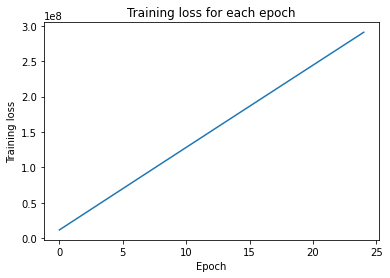

In [17]:
loss_val_over_epochs=[]
loss_sub = 0
for i in range(0,25):
    

    for x,y in zip(df_x_train, df_y_train):
        optimizer.zero_grad()
        output = model(x)
        
        loss = criterion(output,y)
        
        loss_sub+=loss
        
        loss.backward()
        optimizer.step()
    
    loss_val_over_epochs.append((loss_sub).item()/len(df_x_train))
    print('epoch: ',i, 'training loss: ',loss_val_over_epochs[i])
    

plt.plot(list(range(25)),loss_val_over_epochs)
plt.xlabel('Epoch')
plt.ylabel("Training loss")
plt.title("Training loss for each epoch")
plt.show()


In [18]:
total_loss = 0

for x,y in zip(df_x_test, df_y_test):
    
    pred = model(x)
    loss = criterion(pred, y)
    total_loss+=loss

rmse_val = torch.sqrt(total_loss / len(df_x_test)).detach().numpy()
print('RMSE value: ',rmse_val)

RMSE value:  3501.5134


In [19]:
pickle.dump(model, open("/Users/placid_brain/Documents/non text content based models/final_pickle_ver_7", 'wb'))

In [20]:
single_sample_1 = np.array([0.43,0.0,4.0,13.0])
single_sample_1 = torch.from_numpy(single_sample_1.astype(np.float32))
pred_single_1 = model(single_sample_1)
print(pred_single_1)

tensor([9373.1680], grad_fn=<AddBackward0>)


In [21]:
single_sample_2 = np.array([0.382,0.0,0.0,1.0  ])
single_sample_2 = torch.from_numpy(single_sample_2.astype(np.float32))
pred_single_2 = model(single_sample_2)
print(pred_single_2)

tensor([1280.6023], grad_fn=<AddBackward0>)


In [22]:
single_sample_3 = np.array([0.6312,1.0,3.0,21.0    ])
single_sample_3 = torch.from_numpy(single_sample_3.astype(np.float32))
pred_single_3 = model(single_sample_3)
print(pred_single_3)

tensor([15099.6885], grad_fn=<AddBackward0>)
